GOEDUHUB TECHNOLOGIES- TASK 7
REG-NO : GO_STP_7294

In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables. 

*y = ax+b where as x = "Hours", y = "Scores"*


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
dataset=pd.read_csv("StudentHoursScores.csv")
print(dataset)


    Hours  Scores
0     7.7      79
1     5.9      60
2     4.5      45
3     3.3      33
4     1.1      12
5     8.9      87
6     2.5      21
7     1.9      19
8     2.7      29
9     8.3      81
10    5.5      58
11    9.2      88
12    1.5      14
13    3.5      34
14    8.5      85
15    3.2      32
16    6.5      66
17    2.5      21
18    9.6      96
19    4.3      42
20    4.1      40
21    3.0      30
22    2.6      25


In [54]:
dataset.head(10)

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12
5,8.9,87
6,2.5,21
7,1.9,19
8,2.7,29
9,8.3,81


In [55]:
dataset.tail(10)


,Hours,Scores
13,3.5,34
14,8.5,85
15,3.2,32
16,6.5,66
17,2.5,21
18,9.6,96
19,4.3,42
20,4.1,40
21,3.0,30
22,2.6,25


In [56]:
dataset.describe()


,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [58]:
dataset.isna().sum()


Hours     0
Scores    0
dtype: int64

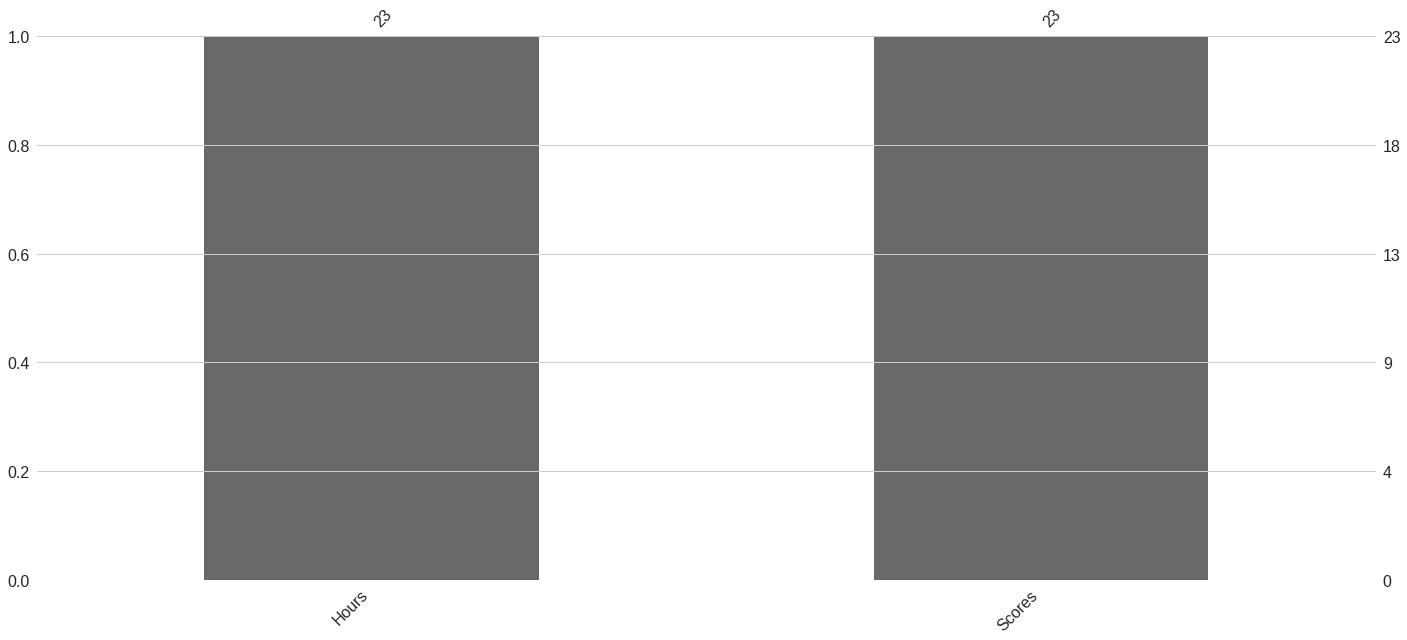

In [59]:
import missingno as msno
msno.bar(dataset)
plt.show()

Data Visualization

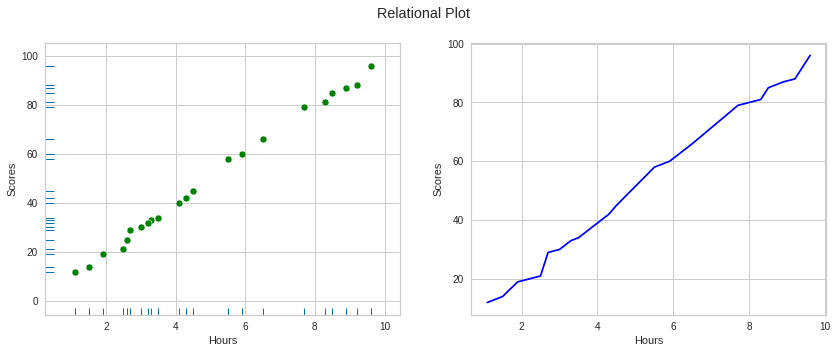

In [60]:
import seaborn as sns
fig, axes = plt.subplots(1,2,figsize=(14, 5))
sns.scatterplot(x = dataset.Hours,y = dataset.Scores,color = 'green',ax = axes[0])
sns.rugplot(x = dataset.Hours,y = dataset.Scores,ax = axes[0])
sns.lineplot(x = dataset.Hours,y = dataset.Scores,color = 'blue',ax = axes[1])
plt.suptitle("Relational Plot")
plt.show()

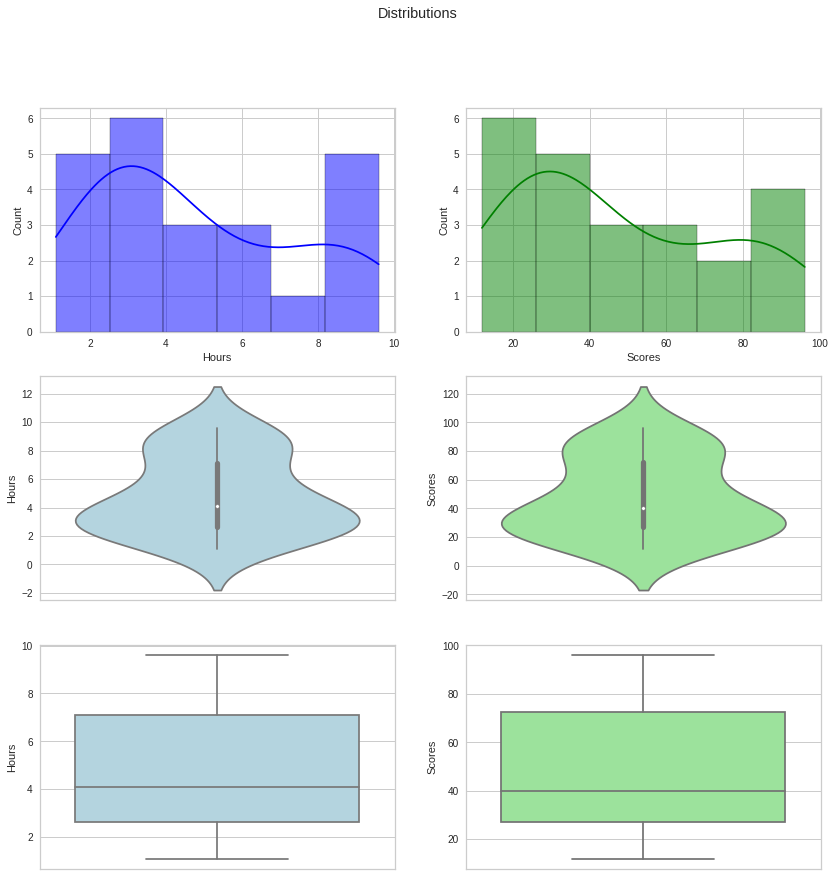

In [61]:
fig, axes = plt.subplots(3,2,figsize=(14, 14))
sns.histplot(x = dataset.Hours, ax = axes[0][0],kde = True,color = 'blue')
sns.histplot(x = dataset.Scores, ax = axes[0][1],kde = True,color = 'green')
sns.violinplot(y = dataset.Hours, ax = axes[1][0],color = 'lightblue')
sns.violinplot(y = dataset.Scores, ax = axes[1][1],color = 'lightgreen')
sns.boxplot(y = dataset.Hours, ax = axes[2][0],color = 'lightblue')
sns.boxplot(y = dataset.Scores, ax = axes[2][1],color = 'lightgreen')
plt.suptitle("Distributions")
plt.show()

Covariation and Correlation

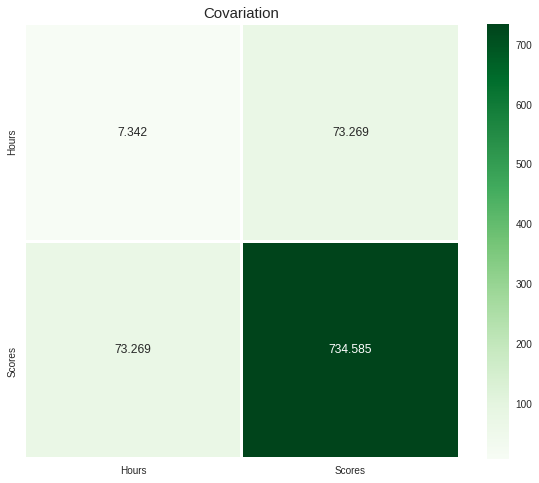

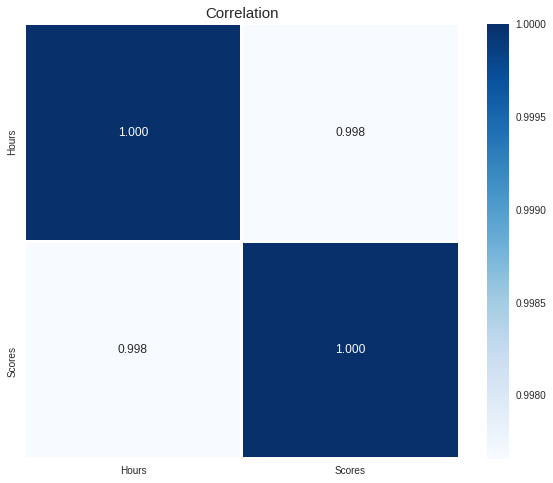

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.cov(), annot=True, fmt =".3f",linewidths= 2, square=True , cmap='Greens')
plt.title("Covariation",size = 15)
plt.show()



plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, fmt =".3f",linewidths= 2, square=True , cmap='Blues')
plt.title("Correlation",size = 15)
plt.show()

Linear Regression

In [63]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=2)

In [64]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(xtrain , ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = lr_reg.predict(xtest)
y_pred[:5]

array([40.63327807, 75.89581777, 29.85861316, 24.9610382 , 83.7319377 ])

In [66]:
lr_reg.coef_


array([9.79514992])

In [67]:
lr_reg.intercept_

0.47316341303940845

In [68]:
am=lr_reg.predict([[5]])


In [69]:
p=9.79514992*5 + 0.47316341303940135
print(p)

49.4489130130394


In [70]:
am==p


array([False])

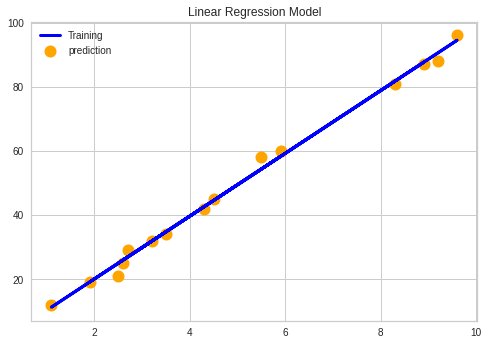

<Figure size 504x504 with 0 Axes>

In [71]:
plt.scatter(xtrain,ytrain,color="orange", linewidth=5 )
plt.plot(xtrain,lr_reg.predict(xtrain), color="blue",linewidth=3)
plt.title("Linear Regression Model")
plt.legend(['Training','prediction'])
plt.figure(figsize=(7,7))
plt.show()


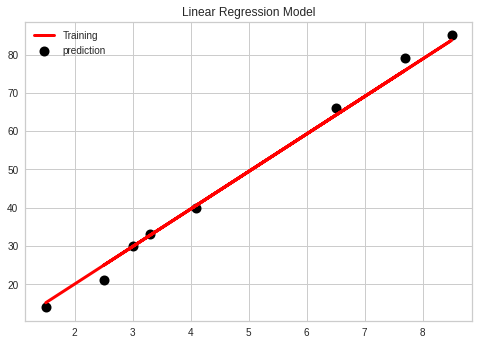

<Figure size 504x504 with 0 Axes>

In [72]:
plt.scatter(xtest,ytest,color="black",linewidth=3)
plt.plot(xtest,lr_reg.predict(xtest), color="red",linewidth=3)
plt.title("Linear Regression Model")
plt.legend(['Training','prediction'])
plt.figure(figsize=(7,7))
plt.show()